In [442]:
# Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import t as t 
from scipy.optimize import curve_fit
from scipy.constants import *

from uncertainties import *
from uncertainties.umath import *

In [443]:
# Reading data
sil = pd.read_excel('data/sil.xlsx')
ger = pd.read_excel('data/ger.xlsx')
d_lam = pd.read_excel('data/d_lam.xlsx')

In [444]:
# Constants and values
lam_max_sil = 0.99

lam_max_ger_1 = 1.325
lam_max_ger_2 = 1.45
lam_min_ger = 1.39

U_max_ger_1 = 1.9
U_max_ger_2 = 1.95
U_min_ger = 1.6

def uncert(data_input, uncert_inst):
    t_coeff = t.ppf((1 + 0.6827)/2, len(data_input)-1)
    return np.sqrt((np.std(data_input)/np.sqrt(len(data_input)))**2 + uncert_inst**2)*t_coeff

In [445]:
# Fit a polynomial for lightbulb
coeff = np.polyfit(d_lam['lam'], d_lam['D'], 3)
poly_D = np.poly1d(coeff)

d_lam_x_fit = np.linspace(min(d_lam['lam'])-200, max(d_lam['lam'])+200, 1000)
d_lam_y_fit = poly_D(d_lam_x_fit)

In [446]:
#Canculation
#converting units to si
sil['lam'] = sil['lam']*10**(-6)
ger['lam'] = ger['lam']*10**(-6)

sil['U'] = sil['U']*0.1*10**(-3)
ger['U'] = ger['U']*0.1*10**(-3)
 
#wavelength to energy in ev
sil['E'] = h*c/sil['lam']/e
ger['E'] = h*c/ger['lam']/e

# D(lambda) calculation
sil['D'] = poly_D(sil['lam']*10**(9))
ger['D'] = poly_D(ger['lam']*10**(9))

# S(lambda) calculation
sil['S'] = sil['U']/sil['D'] * 10**(6)
ger['S'] = ger['U']/ger['D'] * 10**(6)

sil['U'] = sil['U']*10**(3)
sil['lam'] = sil['lam']*10**(9)

ger['U'] = ger['U']*10**(3)
ger['lam'] = ger['lam']*10**(9)

sil = sil.sort_values(by='E')
ger = ger.sort_values(by='E')

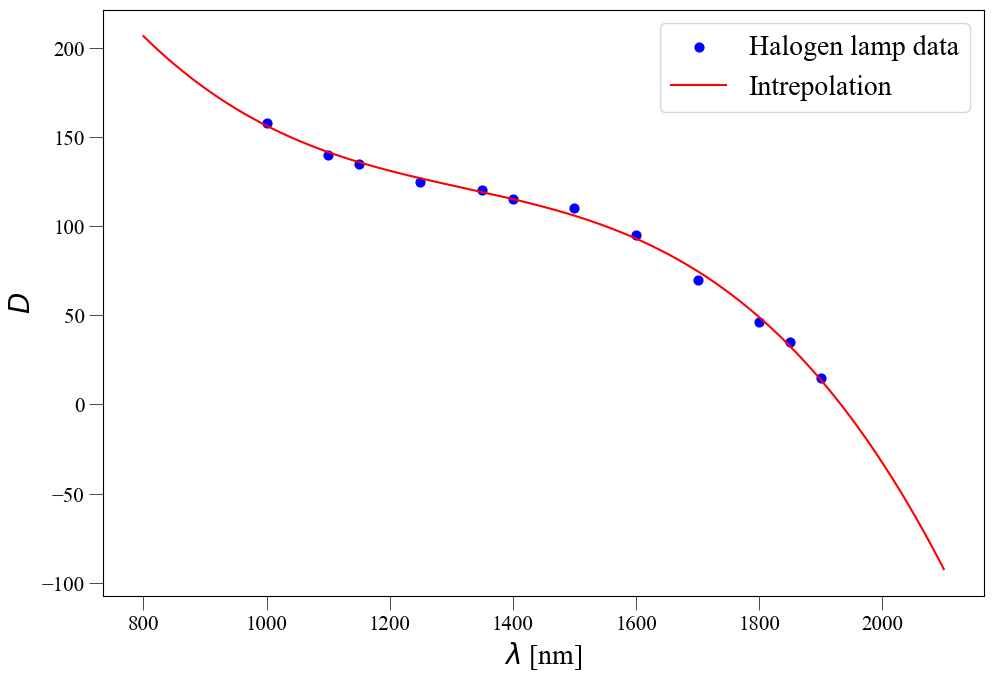

In [447]:
# Plot of D(lambda) interpolation
ax_l_size = 20
l_size = 15

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 7))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$\lambda$ [nm]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$D$")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(d_lam['lam'], d_lam['D'], color='blue', s=40, label='Halogen lamp data')
ax.plot(d_lam_x_fit, d_lam_y_fit, color='red', label='Intrepolation')

ax.legend(loc='upper right', fontsize=20)


plt.show() 

fig.savefig('images/int.png', bbox_inches='tight')

In [448]:
# Fit a polynomial for silicon
coeff = np.polyfit(sil['lam'], sil['S'], 4)
poly_s = np.poly1d(coeff)

sil_x_fit = np.linspace(min(sil['lam']), max(sil['lam']), 1000)
sil_y_fit = poly_s(sil_x_fit)

In [449]:
sil

,U,lam,E,D,S
14,0.011,1170.0,1.059694,133.857631,0.082177
13,0.020,1141.0,1.086628,136.821578,0.146176
12,0.050,1100.0,1.127129,141.524606,0.353295
11,0.070,1077.0,1.151200,144.470385,0.484528
10,0.100,1060.0,1.169662,146.807686,0.681163
9,0.120,1051.0,1.179678,148.103867,0.810242
8,0.150,1037.5,1.195028,150.128357,0.999145
7,0.180,1024.0,1.210783,152.253380,1.182240
6,0.200,990.0,1.252366,158.082807,1.265160
0,0.180,959.0,1.292849,164.045165,1.097259


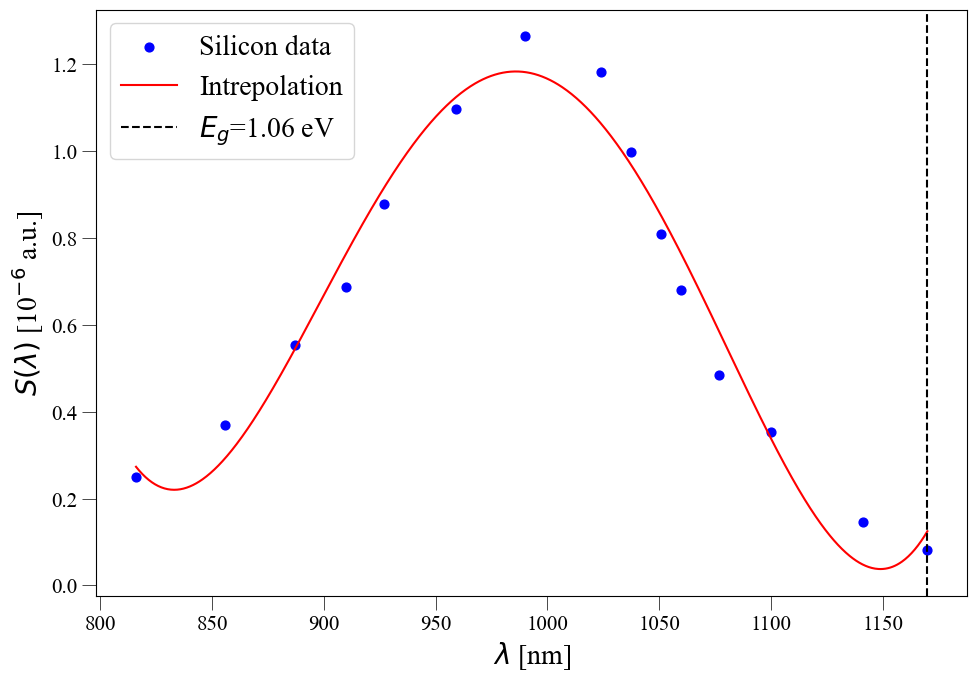

In [450]:
# Plot of S(E) for silicon
plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 7))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$\lambda$ [nm]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$S(\lambda)$ [10$^{-6}$ a.u.]")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.yscale('log')
# plt.xscale('log')
plt.tight_layout()  

ax.scatter(sil['lam'], sil['S'], color='blue', s=40, label='Silicon data')
ax.plot(sil_x_fit, sil_y_fit, color='red', label='Intrepolation')

ax.axvline(x=max(sil['lam']), color='black', linestyle='--', label=f'$E_g$={min(sil["E"]):.2f} eV')

ax.legend(loc='upper left', fontsize=20)


plt.show() 

fig.savefig('images/sil.png', bbox_inches='tight')

In [451]:
# Fit a polynomial for germanium
coeff = np.polyfit(ger['lam'], ger['S'], 4)
poly_g = np.poly1d(coeff)

ger_x_fit = np.linspace(min(ger['lam']), max(ger['lam']), 1000)
ger_y_fit = poly_g(ger_x_fit)

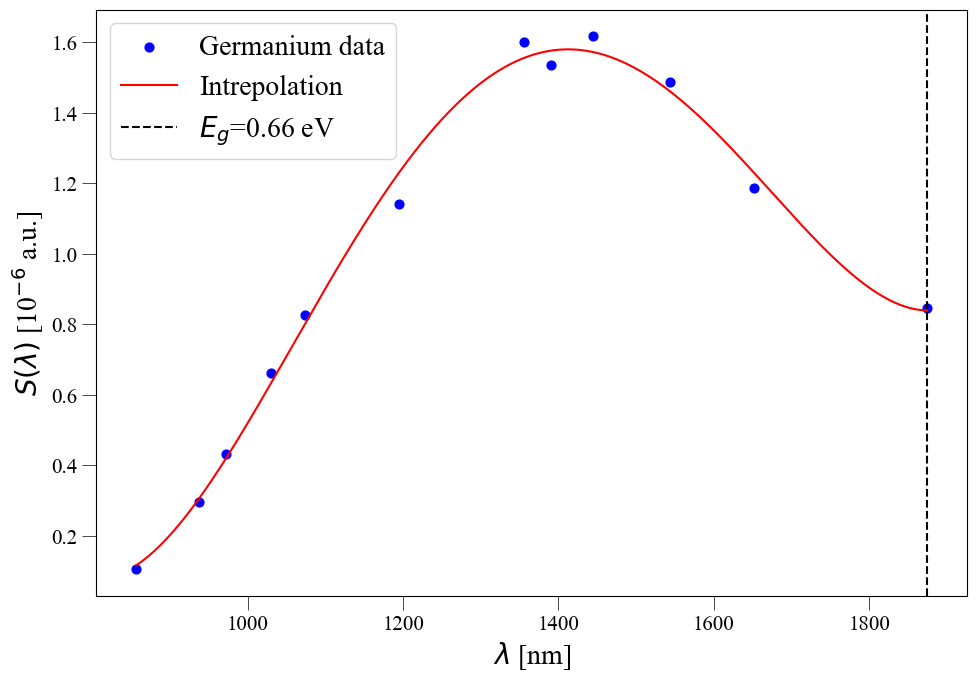

In [452]:
# Plot of S(E) for germanium
plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 7))

# ax.title.set_fontsize(ax_l_size)
ax.set_xlabel(r"$\lambda$ [nm]")
ax.xaxis.label.set_fontsize(ax_l_size)
ax.set_ylabel(r"$S(\lambda)$ [10$^{-6}$ a.u.]")
ax.yaxis.label.set_fontsize(ax_l_size)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=l_size)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=l_size)
# plt.yscale('log')
# plt.xscale('log')
plt.tight_layout()  

ax.scatter(ger['lam'], ger['S'], color='blue', s=40, label='Germanium data')
ax.plot(ger_x_fit, ger_y_fit, color='red', label='Intrepolation')

ax.axvline(x=max(ger['lam']), color='black', linestyle='--', label=f'$E_g$={min(ger["E"]):.2f} eV')

ax.legend(loc='upper left', fontsize=20)

plt.show() 

fig.savefig('images/ger.png', bbox_inches='tight')

In [453]:
sil

,U,lam,E,D,S
14,0.011,1170.0,1.059694,133.857631,0.082177
13,0.020,1141.0,1.086628,136.821578,0.146176
12,0.050,1100.0,1.127129,141.524606,0.353295
11,0.070,1077.0,1.151200,144.470385,0.484528
10,0.100,1060.0,1.169662,146.807686,0.681163
9,0.120,1051.0,1.179678,148.103867,0.810242
8,0.150,1037.5,1.195028,150.128357,0.999145
7,0.180,1024.0,1.210783,152.253380,1.182240
6,0.200,990.0,1.252366,158.082807,1.265160
0,0.180,959.0,1.292849,164.045165,1.097259


In [454]:
sil = sil.round(2)
ger = ger.round(2)

d_lam.to_csv('data/d_lam.csv', index=False)
sil.to_csv('data/sil.csv', index=False)
ger.to_csv('data/ger.csv', index=False)
